<a href="https://colab.research.google.com/github/hilmanrozaini/STQ_trainee/blob/main/Malaysia_CPO_Time_Series_Finalised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import matplotlib.dates as mdates

# FB prophet forecasting

## scale = 1

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmple76chjn/4roybth_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmple76chjn/hkn3jir5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61217', 'data', 'file=/tmp/tmple76chjn/4roybth_.json', 'init=/tmp/tmple76chjn/hkn3jir5.json', 'output', 'file=/tmp/tmple76chjn/prophet_modelid6uk4rv/prophet_model-20240225030924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:09:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


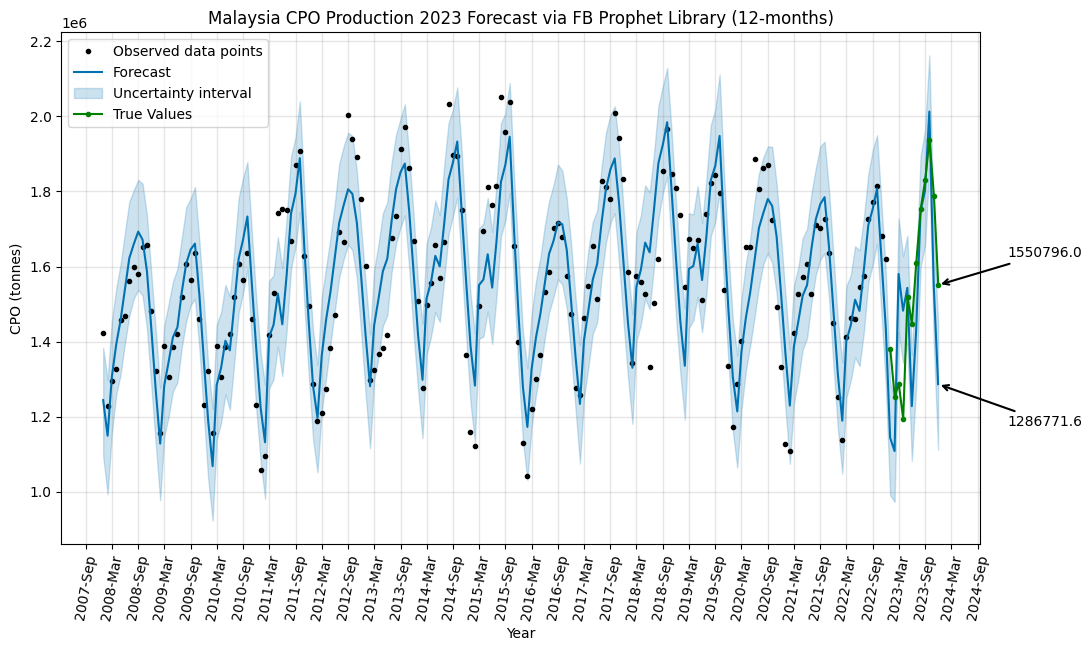

Mean Absolute Error (MAE): 95625.54
Mean Absolute Percentage Error (MAPE): 6.3294%
Change Point Scale is: 1
forecasted value is:  1286771.55
actual value is:  1550796.00


In [20]:
## without cross validation (scale = 1)

from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# load data
dat1 = pd.read_csv('/content/drive/MyDrive/personal_projects/Sabah CPO TS forecasting/Sabah_CPO_STQ.csv')

# change data type
dat1['Month'] = pd.to_datetime(dat1['Month'], format='%d/%m/%Y')   # convert into data format
dat1['Production'] = dat1['Production'].apply(lambda x: int(x.replace(',', '')))  # remove comma from figures and convert into integer data type

# Prepare the data
dat1 = dat1[['Month', 'Production']].copy()
dat1.columns = ['ds', 'y']


# Ensure 'ds' is of datetime data type and 'y' is numeric
dat1['ds'] = pd.to_datetime(dat1['ds'])
dat1['y'] = pd.to_numeric(dat1['y'])

# # Assuming your dataframe is named df and has 'ds' and 'y' columns
# df['ds'] = pd.to_datetime(df['ds'])
# df['y'] = pd.to_numeric(df['y'])

# Split the data into training and test sets
train = dat1[:-12]  # Use all data except the last 12 months for training
test = dat1[-12:]   # Use the last 12 months for testing

# changepoint_scale
changepoint_prior_scale =1

# Create a Prophet model
model = Prophet(changepoint_prior_scale=changepoint_prior_scale)

# Fit the model to the training data
model.fit(train)

# Create future dates for forecasting
future = model.make_future_dataframe(periods=12, freq='M')

# Perform the forecasting
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast, xlabel='Year', ylabel='CPO (tonnes)')

# Plot the true values for the test set
plt.plot(test['ds'], test['y'], label='True Values', color='green', marker='.')

# Get the last point of the forecast
last_point = forecast.tail(1)

# Annotate the value on the last point
plt.annotate(f"{last_point['yhat'].values[0]:.1f}", xy=(last_point['ds'].values[0], last_point['yhat'].values[0]), xycoords='data',
             xytext=(50, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Annotate the true value on the last point
last_true_point = test.tail(1)
plt.annotate(f"{last_true_point['y'].values[0]:.1f}", xy=(last_true_point['ds'].values[0], last_true_point['y'].values[0]), xycoords='data',
             xytext=(50, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Set the x-axis ticks to show every year / months
#fig.gca().xaxis.set_major_locator(mdates.YearLocator())
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

#ax = fig.plot(figsize=(15,5))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.xticks(rotation=80)


# Adjust the plot
plt.title('Malaysia CPO Production 2023 Forecast via FB Prophet Library (12-months)')
plt.legend(loc='upper left')
plt.show()

# -------------performance metrics ---------------------

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Extract relevant columns
y_true = dat1['y']
y_pred = forecast['yhat']

# Align the time periods
common_dates = y_true.index.intersection(y_pred.index)
y_true_aligned = y_true.loc[common_dates]
y_pred_aligned = y_pred.loc[common_dates]

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true_aligned, y_pred_aligned)
mae = mean_absolute_error(y_true_aligned, y_pred_aligned)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100 :.4f}%")
print(f"Change Point Scale is: {changepoint_prior_scale}")
print(f"forecasted value is: {last_point['yhat'].values[0] : .2f}")
print(f"actual value is: {last_true_point['y'].values[0]: .2f}")

## scale = 5

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmple76chjn/t8m4k7l8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmple76chjn/g_bbyi50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57809', 'data', 'file=/tmp/tmple76chjn/t8m4k7l8.json', 'init=/tmp/tmple76chjn/g_bbyi50.json', 'output', 'file=/tmp/tmple76chjn/prophet_model7cq6kksy/prophet_model-20240225031012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


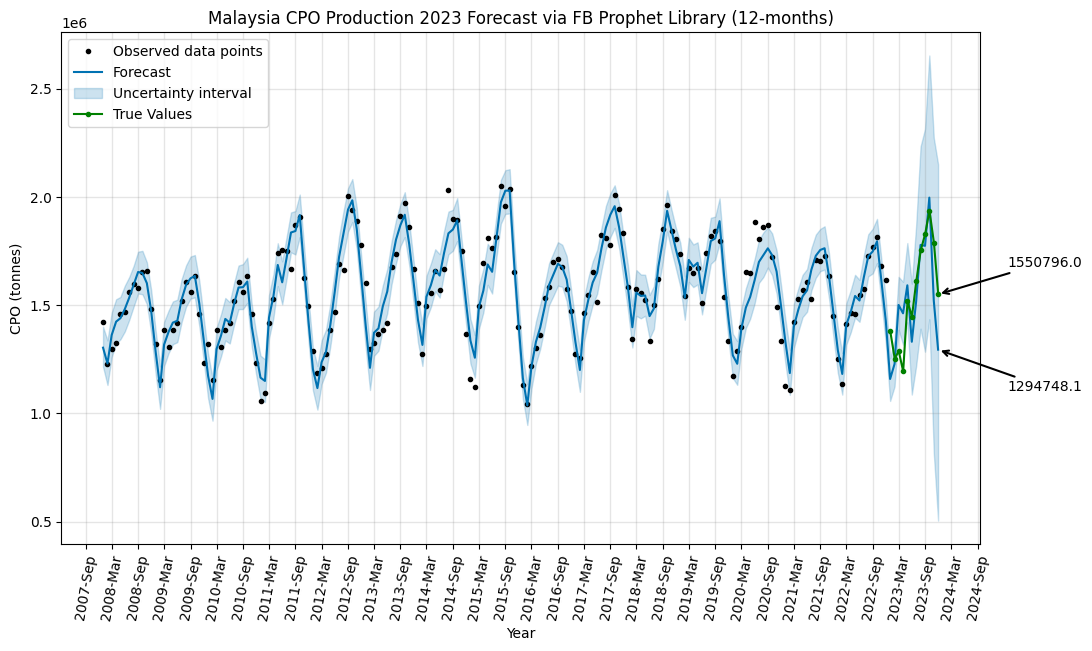

Mean Absolute Error (MAE): 64063.70
Mean Absolute Percentage Error (MAPE): 4.2522%
Change Point Scale is: 5
forecasted value is:  1294748.10
actual value is:  1550796.00


In [21]:
## without cross validation (scale = 5)

from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# load data
dat1_1 = pd.read_csv('/content/drive/MyDrive/personal_projects/Sabah CPO TS forecasting/Sabah_CPO_STQ.csv')

# change data type
dat1_1['Month'] = pd.to_datetime(dat1_1['Month'], format='%d/%m/%Y')   # convert into data format
dat1_1['Production'] = dat1_1['Production'].apply(lambda x: int(x.replace(',', '')))  # remove comma from figures and convert into integer data type

# Prepare the data
dat1_1 = dat1_1[['Month', 'Production']].copy()
dat1_1.columns = ['ds', 'y']

# Ensure 'ds' is of datetime data type and 'y' is numeric
dat1_1['ds'] = pd.to_datetime(dat1_1['ds'])
dat1_1['y'] = pd.to_numeric(dat1_1['y'])

# Split the data into training and test sets
train = dat1_1[:-12]  # Use all data except the last 12 months for training
test = dat1_1[-12:]   # Use the last 12 months for testing

#changepoint scale
changepoint_prior_scale = 5

# Create a Prophet model
model = Prophet(changepoint_prior_scale= changepoint_prior_scale)

# Fit the model to the training data
model.fit(train)

# Create future dates for forecasting
future = model.make_future_dataframe(periods=12, freq='M')

# Perform the forecasting
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast, xlabel='Year', ylabel='CPO (tonnes)')

# Plot the true values for the test set
plt.plot(test['ds'], test['y'], label='True Values', color='green', marker='.')

# Get the last point of the forecast
last_point = forecast.tail(1)

# Annotate the value on the last point
plt.annotate(f"{last_point['yhat'].values[0]:.1f}", xy=(last_point['ds'].values[0], last_point['yhat'].values[0]), xycoords='data',
             xytext=(50, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Annotate the true value on the last point
last_true_point = test.tail(1)
plt.annotate(f"{last_true_point['y'].values[0]:.1f}", xy=(last_true_point['ds'].values[0], last_true_point['y'].values[0]), xycoords='data',
             xytext=(50, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Set the x-axis ticks to show every year / months
#fig.gca().xaxis.set_major_locator(mdates.YearLocator())
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

#ax = fig.plot(figsize=(15,5))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.xticks(rotation=80)

# Adjust the plot
plt.title('Malaysia CPO Production 2023 Forecast via FB Prophet Library (12-months)')
plt.legend(loc='upper left')
plt.show()

# -------------performance metrics ---------------------

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Extract relevant columns
y_true = dat1_1['y']
y_pred = forecast['yhat']

# Align the time periods
common_dates = y_true.index.intersection(y_pred.index)
y_true_aligned = y_true.loc[common_dates]
y_pred_aligned = y_pred.loc[common_dates]

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true_aligned, y_pred_aligned)
mae = mean_absolute_error(y_true_aligned, y_pred_aligned)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100 :.4f}%")
print(f"Change Point Scale is: {changepoint_prior_scale}")
print(f"forecasted value is: {last_point['yhat'].values[0] : .2f}")
print(f"actual value is: {last_true_point['y'].values[0]: .2f}")

# SARIMA forecasting

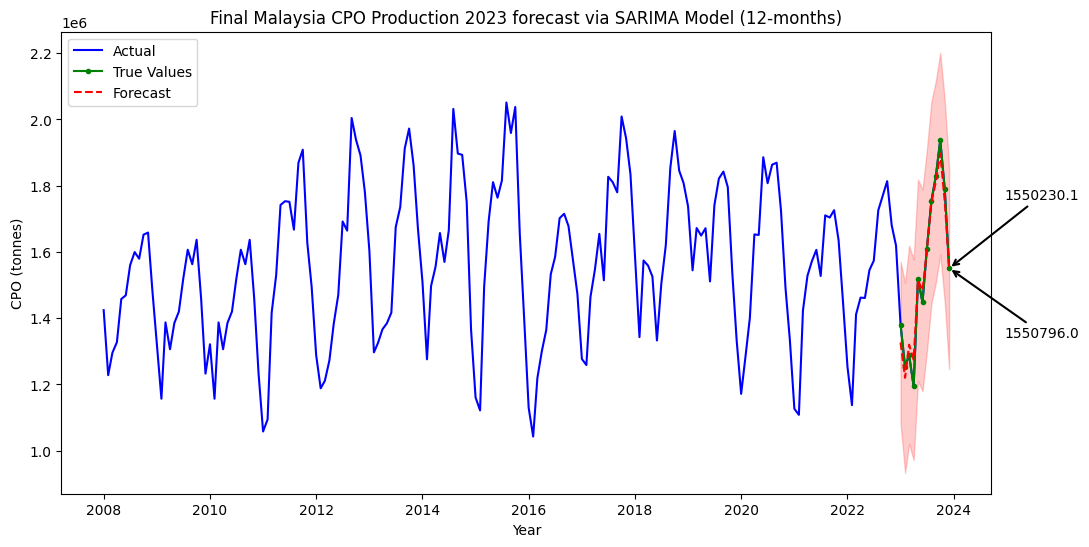

order: (1,0,1)
seasonal order: (1,1,1,12)
MAPE:  2.0131%
MAE:  28623.97
forecasted value is:  1550230.05
actual value is:  1550796.00


In [17]:
#applying cross validation into the model
# but i gonna ignore X-valid since the p,d,q = (0,0,0) , seasonal order = (0,1,1,12) does not really account seasonality
# so i gonna go with default at p,d,q, = (1,0,1), seasonal order = (0,1,1,12)

import itertools
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Load and preprocess the data
dat2_1 = pd.read_csv('/content/drive/MyDrive/personal_projects/Sabah CPO TS forecasting/Sabah_CPO_STQ.csv')
dat2_1['Month'] = pd.to_datetime(dat2_1['Month'], format='%d/%m/%Y')
dat2_1['Production'] = dat2_1['Production'].apply(lambda x: int(x.replace(',', '')))
dat2_1 = dat2_1[['Month', 'Production']].copy()
dat2_1.columns = ['ds', 'y']
dat2_1['ds'] = pd.to_datetime(dat2_1['ds'])
dat2_1['y'] = pd.to_numeric(dat2_1['y'])

# Split the data into training and test sets
train = dat2_1[:-12]
test = dat2_1[-12:]

# # Define the parameter grid for SARIMA
# p = d = q = range(0, 2)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# # Perform grid search with cross-validation
# best_mape = float('inf')
# best_order = None
# best_seasonal_order = None

# for order in pdq:
#     for seasonal_order in seasonal_pdq:
#         try:
#             # Fit the SARIMA model to the training data
#             model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order)
#             results = model.fit()

#             # Perform the forecasting
#             forecast = results.get_forecast(steps=12).predicted_mean

#             # Calculate MAPE on the test set
#             mape = mean_absolute_percentage_error(test['y'], forecast)

#             # calculate MAE on test set
#             mae = mean_absolute_error(test['y'], forecast)

#             # Update the best parameters if the current model has a lower MAPE
#             if mape < best_mape:
#                 best_mape = mape
#                 best_mae = mae
#                 best_order = order
#                 best_seasonal_order = seasonal_order

#         except Exception as e:
#             print(f"Error for order={order}, seasonal_order={seasonal_order}: {e}")

# Now you can use the best hyperparameters to fit the final model and make predictions
final_model = SARIMAX(dat2_1['y'], order=(1,0,1), seasonal_order=(1,1,1,12))
final_results = final_model.fit()



# Plot the final forecast
forecast = final_results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

#             # Calculate MAPE on the test set
mape = mean_absolute_percentage_error(test['y'], forecast_mean)

#             # calculate MAE on test set
mae = mean_absolute_error(test['y'], forecast_mean)

plt.figure(figsize=(12, 6))
plt.plot(dat2_1['ds'], dat2_1['y'], label='Actual', color='blue')
plt.plot(test['ds'], test['y'], label='True Values', color='green', marker='.')
plt.plot(test['ds'], forecast_mean, label='Forecast', color='red', linestyle='dashed')
plt.fill_between(test['ds'], forecast_ci['lower y'], forecast_ci['upper y'], color='red', alpha=0.2)

# Annotate the forecasted value at the last point
plt.annotate(f"{forecast_mean.iloc[-1]:.1f}", xy=(test['ds'].iloc[-1], forecast_mean.iloc[-1]),
             xycoords='data', xytext=(40, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Annotate the last point of the actual values
plt.annotate(f"{test['y'].iloc[-1]:.1f}", xy=(test['ds'].iloc[-1], test['y'].iloc[-1]),
             xycoords='data', xytext=(40, -50), textcoords='offset points', arrowprops=dict(arrowstyle="->", linewidth=1.5))

plt.title('Final Malaysia CPO Production 2023 forecast via SARIMA Model (12-months)')
plt.xlabel('Year')
plt.ylabel('CPO (tonnes)')
plt.legend(loc="upper left")
plt.show()


# Print the best hyperparameters
print(f"order: (1,0,1)")
print(f"seasonal order: (1,1,1,12)")
print(f"MAPE: {mape*100 : .4f}%")
print(f"MAE: {mae: .2f}")
print(f"forecasted value is: {forecast_mean.iloc[-1] : .2f}")
print(f"actual value is: {test['y'].iloc[-1] : .2f}")


# Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


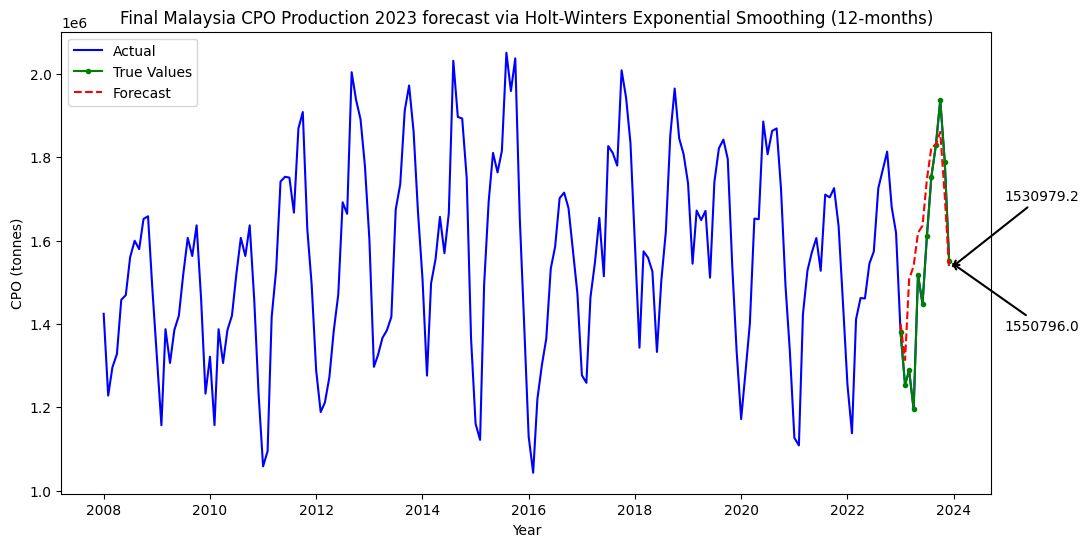

trend and seasonal combination: multiplicative , add
MAPE:  7.8299%
MAE:  109751.70
forecasted value is:  1530979.17
actual value is:  1550796.00


In [23]:
## applying the model suggested from Cross Validation

import itertools
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Load and preprocess the data
dat4 = pd.read_csv('/content/drive/MyDrive/personal_projects/Sabah CPO TS forecasting/Sabah_CPO_STQ.csv')
dat4['Month'] = pd.to_datetime(dat4['Month'], format='%d/%m/%Y')
dat4['Production'] = dat4['Production'].apply(lambda x: int(x.replace(',', '')))
dat4 = dat4[['Month', 'Production']].copy()
dat4.columns = ['ds', 'y']
dat4['ds'] = pd.to_datetime(dat4['ds'])
dat4['y'] = pd.to_numeric(dat4['y'])

# Split the data into training and test sets
train = dat4[:-12]
test = dat4[-12:]

# # Define the parameter grid for Holt-Winters
trend = "multiplicative" #["add", "additive", "additive_t", "multiplicative", "multiplicative_t"]
seasonal = "add" #["add", "additive", "multiplicative", "multiplicative_t"]
# combinations = list(itertools.product(trend, seasonal))


# Now you can use the best hyperparameters to fit the final model and make predictions
final_model = ExponentialSmoothing(dat4['y'], trend=trend, seasonal=seasonal, seasonal_periods=12).fit()


# # Perform grid search with cross-validation
# best_mape = float('inf')
# best_mae = float('inf')
# best_params = None

# for params in combinations:
#     try:
#         # Fit the Holt-Winters model to the training data
#         model = ExponentialSmoothing(train['y'], trend=params[0], seasonal=params[1], seasonal_periods=12).fit()

#         # Perform the forecasting
#         forecast = model.forecast(steps=12)

#         # Calculate MAPE on the test set
#         mape = mean_absolute_percentage_error(test['y'], forecast)

#         # Calculate MAE on test set
#         mae = mean_absolute_error(test['y'], forecast)

#         # Update the best parameters if the current model has a lower MAPE
#         if mape < best_mape:
#             best_mape = mape
#             best_mae = mae
#             best_params = params

#     except Exception as e:
#         print(f"Error for params={params}: {e}")

# # Now you can use the best hyperparameters to fit the final model and make predictions
# final_model = ExponentialSmoothing(dat4['y'], trend=best_params[0], seasonal=best_params[1], seasonal_periods=12).fit()

# final_model = ExponentialSmoothing(dat4['y'], trend=best_params[0], seasonal=best_params[1], seasonal_periods=12)
# final_results = final_model.fit()

# Plot the final forecast
forecast_mean = final_model.forecast(steps=12)
# Plot the final forecast
# forecast = final_model.get_forecast(steps=12)
# forecast_mean = forecast.predicted_mean
# forecast_ci = forecast.conf_int()

# Calculate MAPE on the test set
mape = mean_absolute_percentage_error(test['y'], forecast_mean)

# Calculate MAE on test set
mae = mean_absolute_error(test['y'], forecast_mean)


# # Calculate confidence intervals manually since cannot use "conf_int()"
# alpha = 0.05  # You can adjust the confidence level
# forecast_ci = forecast_mean - np.percentile(final_model.resid, alpha / 2 * 100), forecast_mean + np.percentile(final_model.resid, (1 - alpha / 2) * 100)

plt.figure(figsize=(12, 6))
plt.plot(dat4['ds'], dat4['y'], label='Actual', color='blue')
plt.plot(test['ds'], test['y'], label='True Values', color='green', marker='.')
plt.plot(test['ds'], forecast_mean, label='Forecast', color='red', linestyle='dashed')

# Annotate the forecasted value at the last point
plt.annotate(f"{forecast_mean.iloc[-1]:.1f}", xy=(test['ds'].iloc[-1], forecast_mean.iloc[-1]),
             xycoords='data', xytext=(40, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Annotate the last point of the actual values
plt.annotate(f"{test['y'].iloc[-1]:.1f}", xy=(test['ds'].iloc[-1], test['y'].iloc[-1]),
             xycoords='data', xytext=(40, -50), textcoords='offset points', arrowprops=dict(arrowstyle="->", linewidth=1.5))

# # Plot uncertainty intervals
# plt.fill_between(test['ds'], forecast_ci[0], forecast_ci[1], color='red', alpha=0.2)
# Plot uncertainty intervals
# plt.fill_between(test['ds'], forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)


plt.title('Final Malaysia CPO Production 2023 forecast via Holt-Winters Exponential Smoothing (12-months)')
plt.xlabel('Year')
plt.ylabel('CPO (tonnes)')
plt.legend(loc="upper left")
plt.show()

# Print the best hyperparameters
print(f"trend and seasonal combination: {trend} , {seasonal}")
print(f"MAPE: {mape*100 : .4f}%")
print(f"MAE: {mae: .2f}")
print(f"forecasted value is: {forecast_mean.iloc[-1] : .2f}")
print(f"actual value is: {test['y'].iloc[-1] : .2f}")
